In [2]:
import os
import sys

import cv2
import numpy as np
import matplotlib.pyplot as plt

import pyopenpose as op
os.chdir('/home/jovyan/image')

In [3]:
OPENPOSE_BIN = os.environ.get('OPENPOSE_BIN', '/openpose/build/examples/openpose/openpose.bin')
OPENPOSE_MODELS_DIR = os.environ.get('OPENPOSE_MODELS_DIR', '/openpose/models')

# Starting OpenPose
params = dict()
params["model_folder"] = OPENPOSE_MODELS_DIR
opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()

In [4]:
def load_image(path: str):
    return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)


def show_image(img: np.ndarray):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.imshow(img)
    ax.grid('off')
    ax.axis('off')
    plt.show()
    plt.close()


def pose_detection(img: np.ndarray):
    """ Perform OpenPose inference on a single input image (should be numpy RGB array). """

    # Process Image
    datum = op.Datum()
    datum.cvInputData = img
    opWrapper.emplaceAndPop([datum])

    return datum.poseKeypoints, datum.cvOutputData

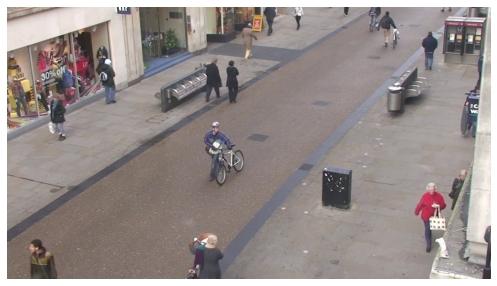

In [5]:
img = load_image('example_001.png')
show_image(img)

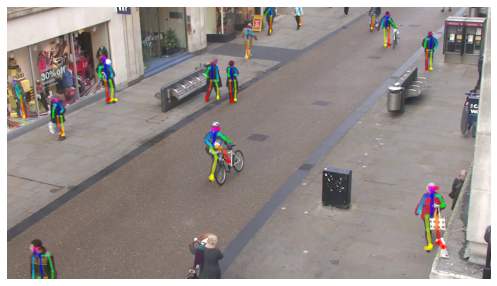

In [6]:
poses, img_pose = pose_detection(img)
show_image(img_pose)